# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 11.11.2021

Мягий дедлайн: 23:59MSK 23.11.2021

Жестокий дедлайн: 23:59MSK 26.11.2021

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/31332/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = 'spring'

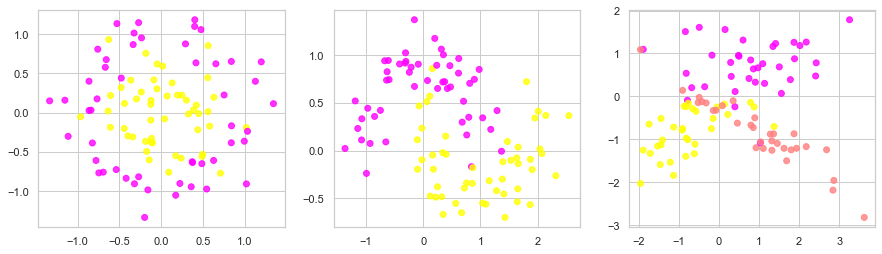

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = 'spring'
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

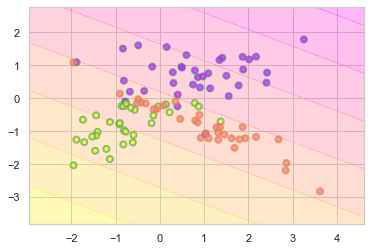

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder



In [8]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in range(len(datasets)):
    X_train_temp, X_test_temp, y_train_temp, y_test_temp = \
        train_test_split(datasets[i][0],datasets[i][1], test_size=0.3, random_state=42)
    X_train.append(X_train_temp)
    y_train.append(y_train_temp)
    X_test.append(X_test_temp)
    y_test.append(y_test_temp)

Text(0.5, 1.0, 'CIRCLES\nTRAIN accuracy1.0\nTEST accuracy0.7333333333333333')

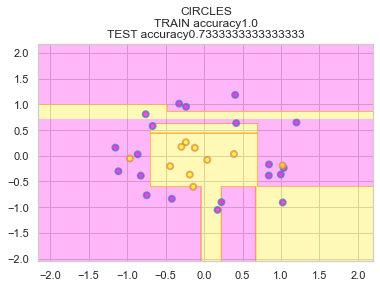

In [9]:
accuracy = [[] for _ in range(3)]

clf = DecisionTreeClassifier().fit(X_train[0], y_train[0],)
accuracy[0].append(accuracy_score(y_train[0], clf.predict((X_train[0]))))
accuracy[0].append(accuracy_score(y_test[0], clf.predict(X_test[0])))

plot_surface(clf, X_test[0], y_test[0])

plt.title(
    'CIRCLES' + '\n' + \
    'TRAIN accuracy' + str(accuracy[0][0]) + '\n' + \
    'TEST accuracy' + str(accuracy[0][1]))

Text(0.5, 1.0, 'MOONS\nTRAIN accuracy1.0\nTEST accuracy0.8666666666666667')

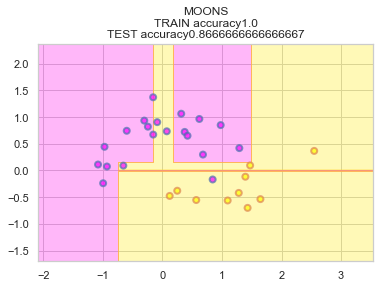

In [10]:
clf = DecisionTreeClassifier().fit(X_train[1], y_train[1],)
accuracy[1].append(accuracy_score(y_train[1], clf.predict((X_train[1]))))
accuracy[1].append(accuracy_score(y_test[1], clf.predict(X_test[1])))

plot_surface(clf, X_test[1], y_test[1])
plt.title(
    'MOONS' + '\n' + \
    'TRAIN accuracy' + str(accuracy[1][0]) + '\n' + \
    'TEST accuracy' + str(accuracy[1][1]))

Text(0.5, 1.0, 'CLASSIFICATION\nTRAIN accuracy1.0\nTEST accuracy0.8333333333333334')

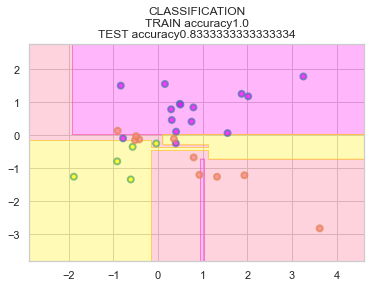

In [11]:
clf = DecisionTreeClassifier().fit(X_train[2], y_train[2],)
accuracy[2].append(accuracy_score(y_train[2], clf.predict((X_train[2]))))
accuracy[2].append(accuracy_score(y_test[2], clf.predict(X_test[2])))

plot_surface(clf, X_test[2], y_test[2])
plt.title(
    'CLASSIFICATION' + '\n' + \
    'TRAIN accuracy' + str(accuracy[2][0]) + '\n' + \
    'TEST accuracy' + str(accuracy[2][1]))

In [12]:
accuracy

[[1.0, 0.7333333333333333],
 [1.0, 0.8666666666666667],
 [1.0, 0.8333333333333334]]

__Ответ:__ Видим, что на трейне аккюраси = 1, значит переобучились

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

In [13]:
from matplotlib.pyplot import subplot2grid
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
def custom_grid(X_train_temp, y_train_temp, X_test_temp, y_test_temp):
    plt.figure(figsize=(14, 14))
    for i, max_depth in enumerate([2, 4, None]):
        for j, min_samples_leaf in enumerate([15, 5, 1]):
            clf = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
            clf.fit(X_train_temp, y_train_temp)
            xx, yy = get_grid(X_train_temp)
            predicted = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

            plt.subplot2grid((3, 3), (i, j))
            plt.pcolormesh(xx, yy, predicted, cmap='autumn')
            plt.scatter(X_train_temp[:, 0], X_train_temp[:, 1], c=y_train_temp, s=30, cmap='spring', edgecolor='k')
            train_acc = accuracy_score(y_train_temp, clf.predict(X_train_temp))
            test_acc = accuracy_score(y_test_temp, clf.predict(X_test_temp))
            plt.title(
                    'max_depth=' + str(max_depth) + '\n' + \
                    'min_samples_leaf=' + str(min_samples_leaf) + '\n' + \
                    'TRAIN accuracy=' + str(round(train_acc, 3)) + '\n' + \
                    'TEST accuracy=' + str(round(test_acc, 3)) + '\n')

            #plt.title('max_depth=' + str(max_depth) + ' | min_samples_leaf=' + str(min_samples_leaf))

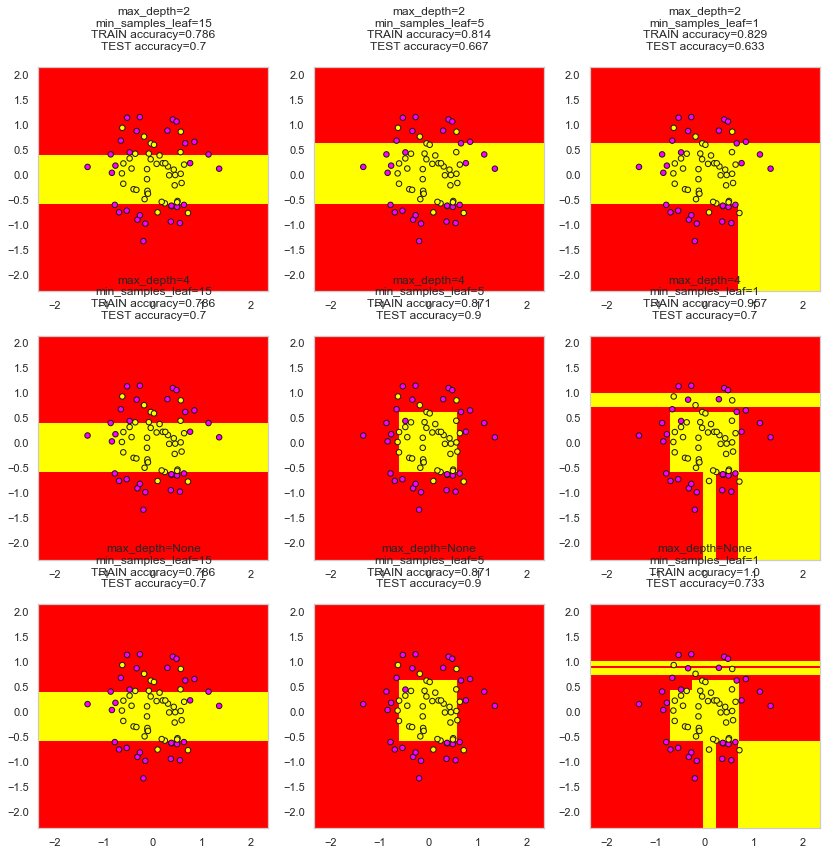

In [14]:
custom_grid(X_train[0], y_train[0], X_test[0], y_test[0])

# CIRCLES

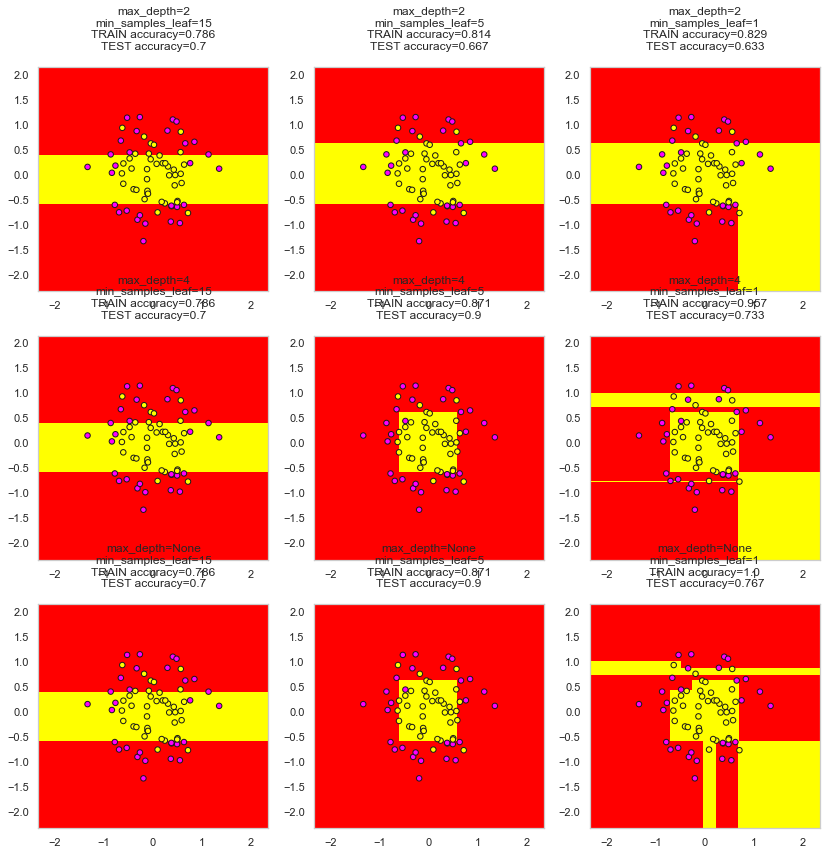

In [15]:
custom_grid(X_train[0], y_train[0], X_test[0], y_test[0])

## MOONS

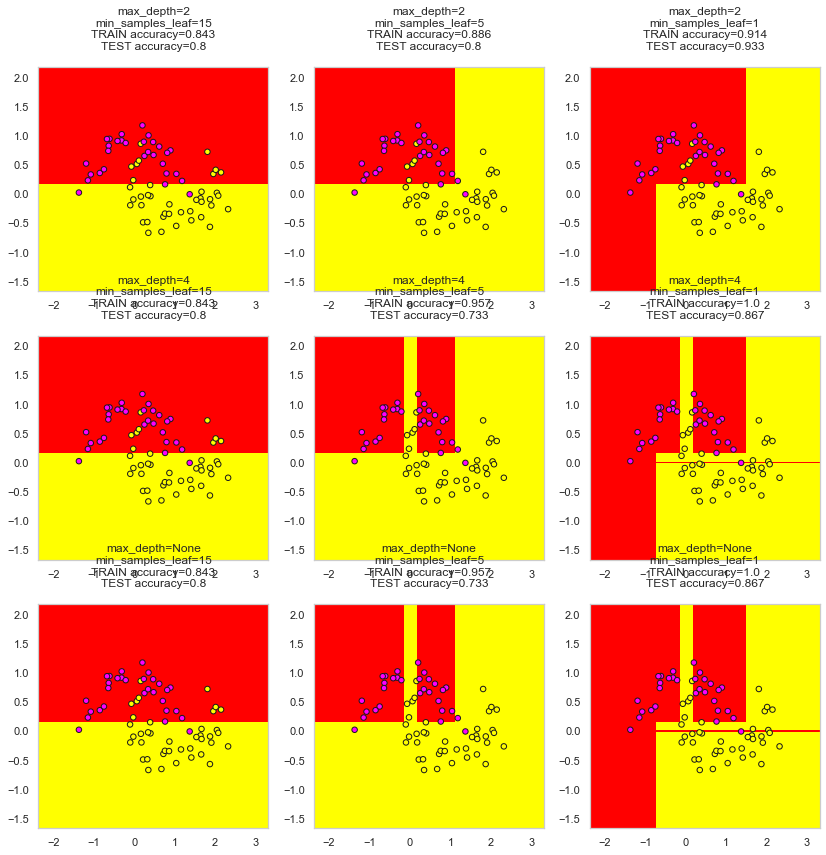

In [16]:
custom_grid(X_train[1], y_train[1], X_test[1], y_test[1])

## CLASSIFICATION

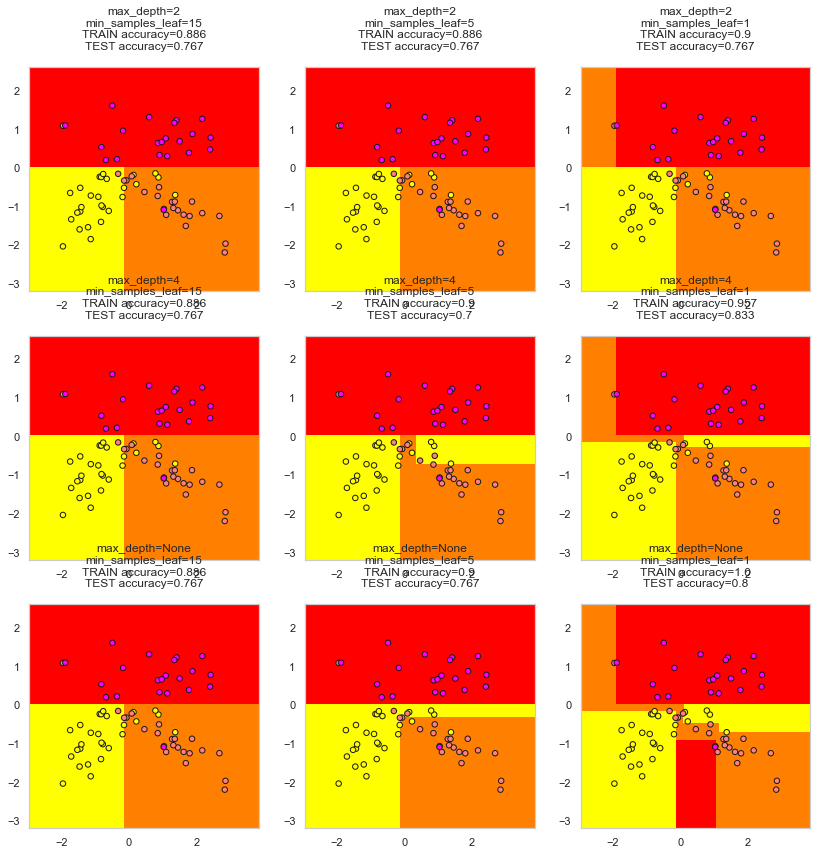

In [17]:
custom_grid(X_train[2], y_train[2], X_test[2], y_test[2])

__Ответ:__ видим, что с увеличением глубины и уменьшением минимального кол-ва объектов в листе, разделяющая поверхность усложняется -- проводится больше "разделяющих прямых", параллельных осям координат. Это логично, потому что эти параметры напрямую влияют на глубину дерева, а одна "разделяющая прямая" это одно сравнение в узлах дерева.

Для разных датасетов получаются разные разделяющие поверхности -- это в принципе очевидно. 

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

$$Q(R) = -\frac {|R_l|}{|R|}H(R_l) -\frac {|R_r|}{|R|}H(R_r)$$,
    $R$ — множество объектов, $R_l$ и $R_r$ — объекты, попавшие в левое и правое поддерево,
     $H(R) = 1-p_1^2-p_0^2$, $p_1$, $p_0$ — доля объектов класса 1 и 0 соответственно.

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков.

In [18]:
%load_ext autoreload
%autoreload 2

In [19]:
from hw5code import find_best_split
df = pd.read_csv('students.csv')
x = df.drop(columns=[' UNS'])
y = df[' UNS']

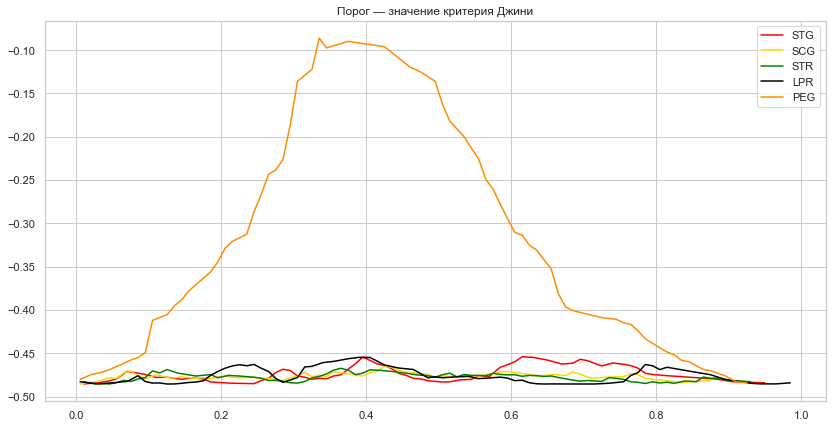

In [20]:
plt.figure(figsize=(14, 7))
col = ['red', 'gold', 'green', 'black', 'darkorange']
co = 0
for i in x.columns:
    tresholds, ginis, treshold_best, gini_best = find_best_split(x[i].values, np.array(y))
    plt.plot(tresholds, ginis, c=col[co])
    co += 1
plt.title('Порог — значение критерия Джини')
plt.legend(x.columns);

Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

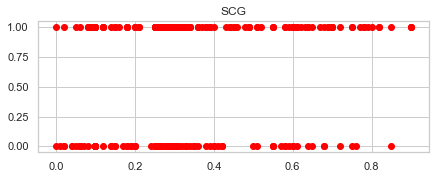

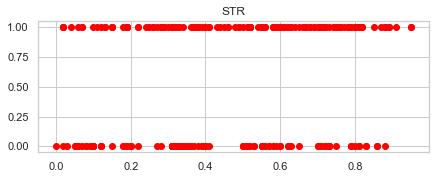

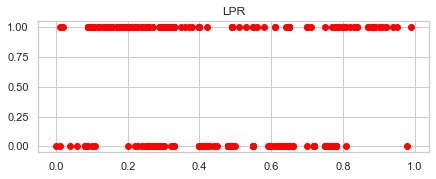

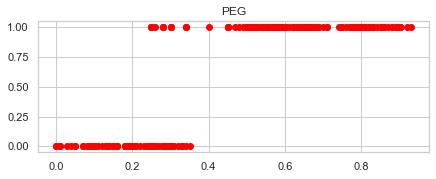

In [21]:
for i in range(1, 5):
    plt.figure(figsize=(7, 14))
    plt.subplot(5, 1, i)
    plt.scatter(x.iloc[:,i], y, color = 'red')
    plt.title(x.columns[i])

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** по графику Джини можно сделать вывод, что разбиение нужно делать по признаку PEG.  На scatter графике значения PEG для объектов-ноликов почти строго меньше чем для объектов-единичек. Это явно позволяет заключить, что признак PEG "хороший". 

Кривая для хороших признаков имеет резкий скачок около значения оптимального разбиения, тогда как кривая для плохих признаков всегда имеет примерно константное значение

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [22]:
df1 = pd.read_csv('agaricus-lepiota.data')
df1

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [23]:
df1 = df1.apply(LabelEncoder().fit_transform)

In [24]:
x = df1.drop(columns=['p'])
y = df1['p']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [25]:
from hw5code import DecisionTree

In [26]:
clf = DecisionTree(
    feature_types=['categorical' for _ in range(X_train.shape[1])]
).fit(X_train.values, np.array(y_train))


In [27]:
y_test

1971    1
4661    0
5444    1
6526    1
5876    1
       ..
5086    0
7532    0
1626    0
4962    1
2503    0
Name: p, Length: 4062, dtype: int64

In [28]:
pred = clf.predict(X_test)
accuracy_score(y_test.astype('int'), pred)

1.0

__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [29]:
data = {'mushrooms': (x, y)}    

In [30]:
df_tic_tac = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data')
df_tic_tac = df_tic_tac.apply(LabelEncoder().fit_transform)
x0 = df_tic_tac.drop(columns=['positive']).values
y0 = df_tic_tac['positive'].values

In [31]:
df_cars = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data')
df_cars['unacc'][(df_cars['unacc'] == 'unacc') | (df_cars['unacc'] == 'acc')] = 0
df_cars['unacc'][(df_cars['unacc'] == 'vgood') | (df_cars['unacc'] == 'good')] = 1
df_cars = df_cars.apply(LabelEncoder().fit_transform)
x1 = df_cars.drop(columns=['unacc']).values
y1 = df_cars['unacc'].values

In [32]:
df_nurs = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data')
df_nurs.columns= ['parents', 'has_nurs', 'form', 'children', 'housing', 'finance', 'social', 'health', 'target']
df_nurs['target'][(df_nurs['target'] == 'not_recom') | (df_nurs['target'] == 'recommend')] = 0
df_nurs['target'][(df_nurs['target'] == 'very_recom') | (df_nurs['target'] == 'priority') | (df_nurs['target'] == 'spec_prior')] = 1
df_nurs = df_nurs.apply(LabelEncoder().fit_transform)
x2 = df_nurs.drop(columns=['target']).values
y2 = df_nurs['target'].values

In [33]:
data = {'tic_tac_toe': (x0, y0),
        'cars': (x1, y1),
        'nursery': (x2, y2)}

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder

REAL

In [36]:
for name in data.keys():
    x, y = data[name]
    clf = DecisionTree(['real'] * x.shape[1])
    print(name, 'ACCURACY =', np.mean(cross_val_score(clf, x, y, scoring='accuracy', cv=10)))

tic_tac_toe ACCURACY = 0.4626973684210527
cars ACCURACY = 0.9425998118026616
nursery ACCURACY = 0.9998456790123458


CATEGORICAL

In [39]:
for name in data.keys():
    x, y = data[name]
    clf = DecisionTree(['categorical'] * x.shape[1])
    print(name, 'ACCURACY =', np.mean(cross_val_score(clf, x, y, scoring='accuracy', cv=10)))

tic_tac_toe ACCURACY = 0.5482127192982456
cars ACCURACY = 0.9675191558005108
nursery ACCURACY = 0.9999228395061728


SKLEARN

In [40]:
from sklearn.tree import DecisionTreeClassifier
for name in data.keys():
    x, y = data[name]
    clf = DecisionTreeClassifier()
    print(name, 'ACCURACY =', np.mean(cross_val_score(clf, x, y, scoring='accuracy', cv=10)))



tic_tac_toe ACCURACY = 0.7496491228070175
cars ACCURACY = 0.9443708831832234
nursery ACCURACY = 0.9998456790123458


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 


**Ответ:**
Видим, что для разных наборов данных алгоритмы ранжируются одинаково. Хуже всего работает для вещественных признаков, т.к. работа с ними предполагает наличие естественного "отношения порядка", что не верно для всех признаков, на самом деле являющимися категориальными, а значит они, по сути, довольно плохо учитываются нашей моделью.

Далее по качеству получается комбинация категориальных + вещественных -- логично, категориальные стали учитываться, а вещественные и так довольно хорошо работают

Лучше всего когда мы считаем все признаки категориальными. В этом случае мы можем получить произвольное разбиение внутри узла дерева, что и вызывает прирост качества. 

Вставьте что угодно, описывающее ваши впечатления от этого задания: